In [1]:
from geopredictors.facie_predictor.predictor import FaciesPredictor
from geopredictors.prediction_tool.permeability_predictor import permeability_predict


/home/yc4923/miniconda3/envs/arcadia/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


No GPU available!


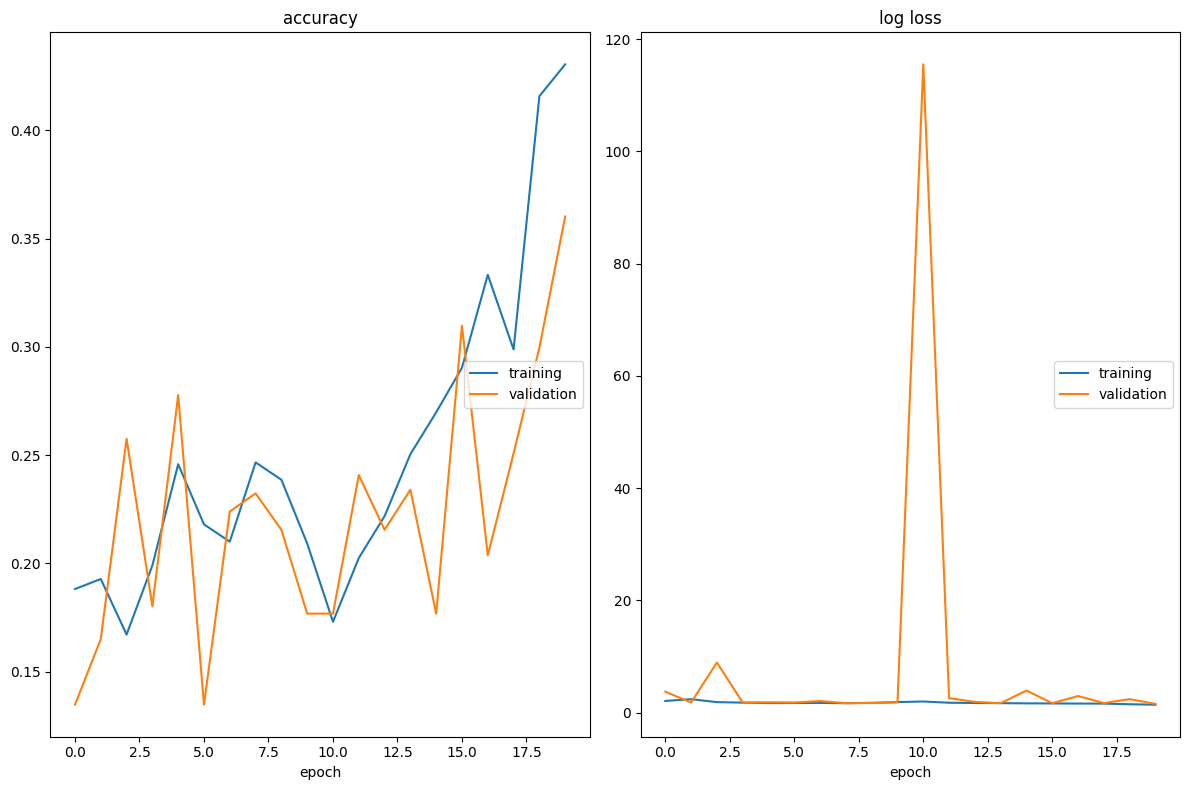

accuracy
	training         	 (min:    0.167, max:    0.431, cur:    0.431)
	validation       	 (min:    0.135, max:    0.360, cur:    0.360)
log loss
	training         	 (min:    1.419, max:    2.401, cur:    1.419)
	validation       	 (min:    1.564, max:  115.497, cur:    1.564)


In [2]:
#Let's initiate an instance of our FaciesPredictor class, without dropout and basic
predictor = FaciesPredictor(dropout=False)

#Now let's specify the path to the data we want to train the model with
#This is the path to the training data
training_path = '/home/yc4923/GEMS/Projects/ads-arcadia-geopredictors/data/small_training'

#We have the choice to either load a model or retrain it with new data.
#By the way if you want to retrain the data, you need to feed it with the 
#same type of data as the one used to train the model.
#refer to notebook called prepare_training_data.ipynb to see how to prepare the data
#To be honest I was going to make a .py file that prepares the training data but 
#I don't know what you want to feed it? csv files? or npy files? anyway just 
#use my training data. it's a balanced data set with 500 samples of each facies
#each sample is a npy file. 

#train without scheduler
predictor.train(training_path,epochs=50,lr=0.001,weight_decay=1e-4,scheduler=False)


In [3]:
#As we can see we got an accuracy of around 0.431
#Let's create another instance of our FaciesPredictor class
predictor2 = FaciesPredictor(dropout=True,dropout_rate=0.15)
training_path = '/home/yc4923/GEMS/Projects/ads-arcadia-geopredictors/data/small_training'
#This time we will train it using a scheduler
predictor2.train(training_path,epochs=100,lr=0.002,weight_decay=1e-4,scheduler=True)

Iteration [10/38] Loss: 105.3928 Accuracy: 0.0930
Iteration [20/38] Loss: 97.9159 Accuracy: 0.2083


KeyboardInterrupt: 

In [ ]:
#Now using our model let's test it on unseen data
#To predict facies we need to feed it with a npy image along with an npy respective depth
#Let's load the image and depth

image_path = '/home/yc4923/GEMS/Projects/ads-arcadia-geopredictors/data/small_test/204-20-3_image.npy'
depth_path = '/home/yc4923/GEMS/Projects/ads-arcadia-geopredictors/data/small_test/204-20-3_depth.npy'

#Now let's predict the facies
predictor2.predict(image_path,depth_path)

RuntimeError: stack expects a non-empty TensorList

In [ ]:
#as for predictor2
predictor2.predict(image_path,depth_path)

In [ ]:
#finally we can export the results
#This will save the predicted facies as a csv file, start and end depth along with corresponding facies
export_path = '/home/yc4923/GEMS/Projects/ads-arcadia-geopredictors/data/predicted_facies'
predictor2.export(export_path)